# Spacy Language Processing Pipelines

In [1]:
import spacy

In [2]:
#this will create a blank pipeline,but we get tokenizer component by default in the pipeline
nlp=spacy.blank('en')

In [3]:
doc=nlp("For example, say that you want to classify product descriptions and use the following tags: Electronics, Computers, Cell Phones, Clothing, and Automotive. In this case, Computers and Cell Phones should be subtags of Electronics as they are a specific type of electronics. So, in this case, it’s recommended to create a hierarchical structure with your tags and therefore build 2 classifiers: one that is able to classify product descriptions using the top level tags (Electronics, Clothing, and Automotive) and a second one that categorizes using the Electronics subtags (Computers and Cell Phones).")

In [6]:
for token in doc:
    print(token)

For
example
,
say
that
you
want
to
classify
product
descriptions
and
use
the
following
tags
:
Electronics
,
Computers
,
Cell
Phones
,
Clothing
,
and
Automotive
.
In
this
case
,
Computers
and
Cell
Phones
should
be
subtags
of
Electronics
as
they
are
a
specific
type
of
electronics
.
So
,
in
this
case
,
it
’s
recommended
to
create
a
hierarchical
structure
with
your
tags
and
therefore
build
2
classifiers
:
one
that
is
able
to
classify
product
descriptions
using
the
top
level
tags
(
Electronics
,
Clothing
,
and
Automotive
)
and
a
second
one
that
categorizes
using
the
Electronics
subtags
(
Computers
and
Cell
Phones
)
.


In [7]:
nlp.pipe_names

[]

## nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer

## More general diagram for nlp pipeline may look something like below

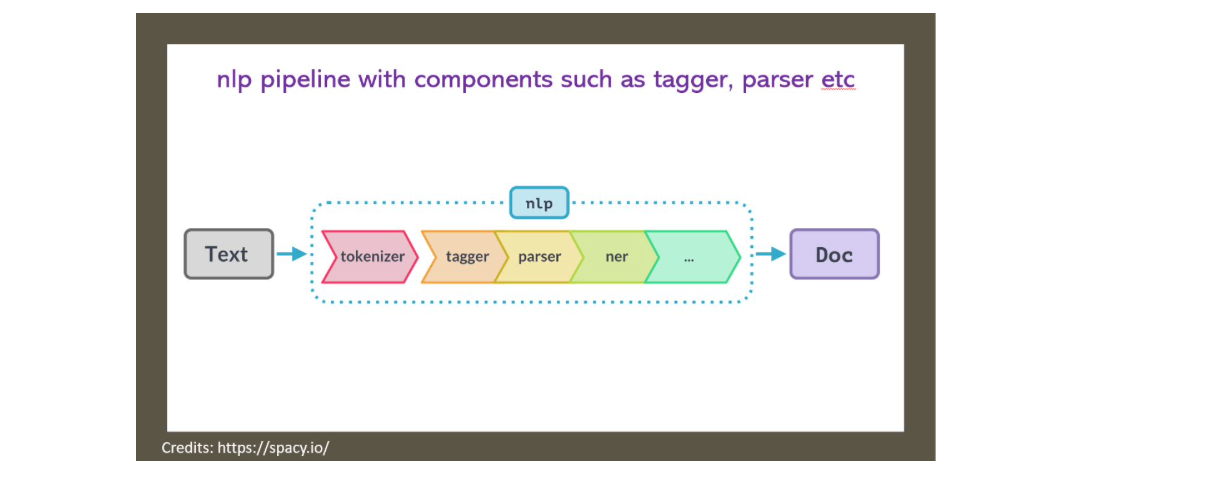

## and an empty pipeline looks something like this
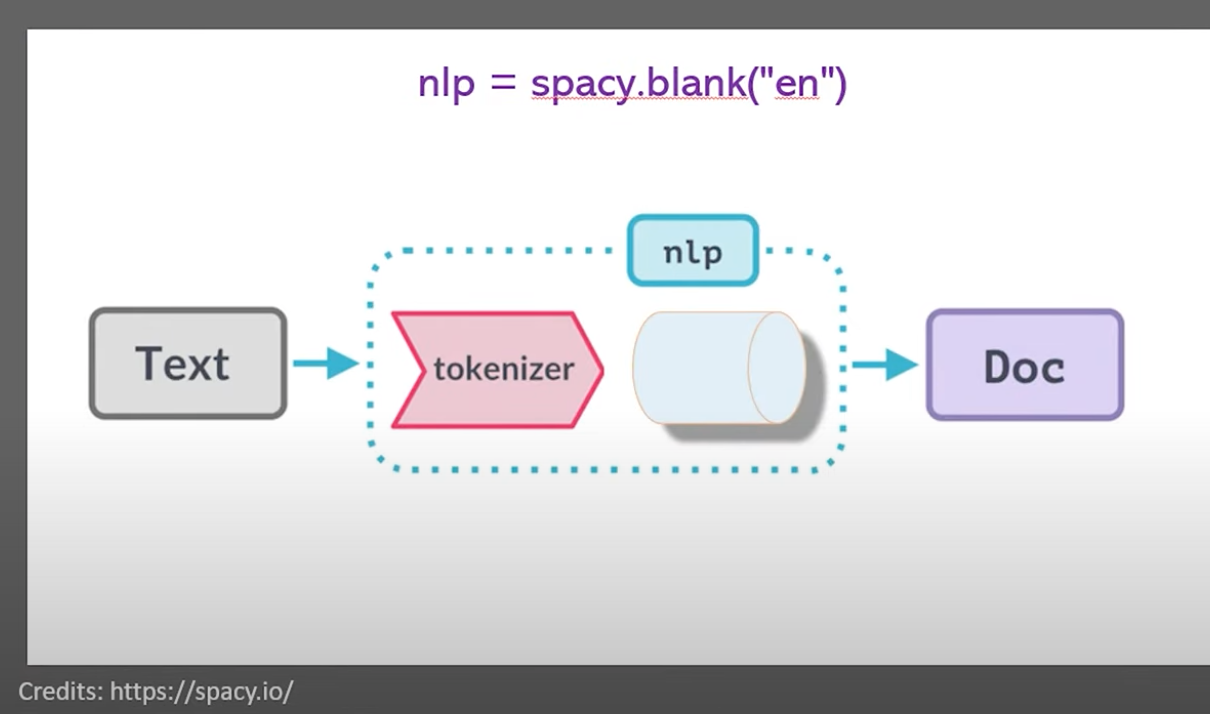

## We can even Download trained pipeline
### To download trained pipeline use a command such as,

### python -m spacy download en_core_web_sm

### This downloads the small (sm) pipeline for english language

### Further instructions on : https://spacy.io/usage/models#quickstart

In [16]:
!spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 12.3 MB/s eta 0:00:01   |▊                               | 307 kB 1.3 MB/s eta 0:00:10
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
#let's load the english pipeline
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names
# see pipe names are now not empty

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [19]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)
    
# token.pos_ ---this means part of speech  
# token.lemma_  ---this shows the base word

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  noun  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


## Named Entity Recognition

In [23]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text,"|", ent.label_,"|",spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [24]:
from spacy import displacy

displacy.render(doc, style="ent")

## Adding a component to a blank pipeline

In [25]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [26]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


### In below image you can see sentecizer component in the pipeline

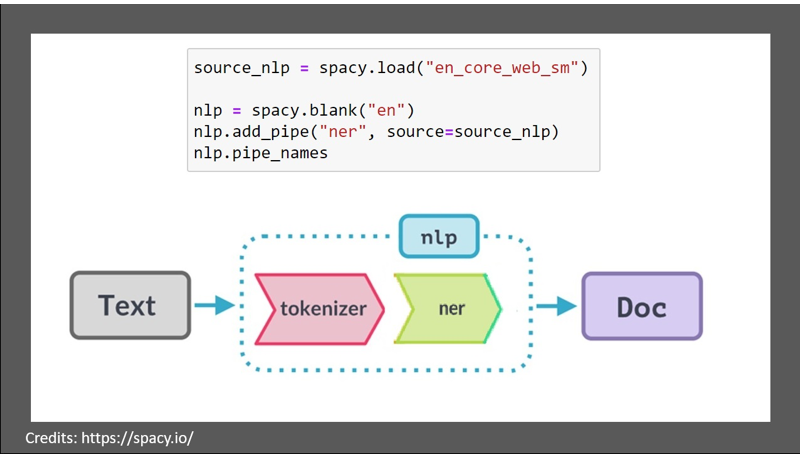